In [1]:
import pylab as py
import random
%matplotlib inline

In [2]:
class Simulation():
    def __init__(self,houses):
        self.houses = 1000
        self.runs = []
    def simulateSingle(self):
        wealth = [100] * self.houses
        for robber in range(self.houses):
            robbed = random.randint(0,self.houses-1)
            while robbed==robber:
                robbed = random.randint(0,self.houses-1)
            wealth[robber] = wealth[robber] + wealth[robbed]
            wealth[robbed] = 0
        self.runs.append(wealth)
    def summarize(self):
        return sum(py.array(self.runs)) * 1. / len(self.runs)
    def getHistogram(self):
        vec = py.array(self.runs)
        maximum = max(vec.flatten())
        bins = int(maximum / 100) + 1
        histogram = py.zeros((self.houses,bins))
        for house in range(self.houses):
            for result in vec.T[house]:
                bn = int(result/100)
                histogram[house,bn] += 1
        return histogram

In [3]:
c = Simulation(1000)

In [4]:
[c.simulateSingle() for x in range(20000)];

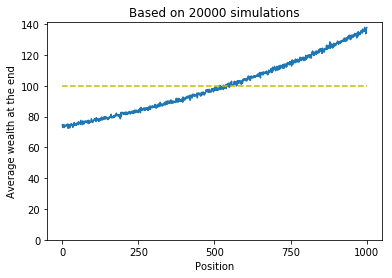

In [5]:
fig,ax = py.subplots()
ax.set_title('Based on {} simulations'.format(len(c.runs)))
ydata = c.summarize()
xdata = py.arange(len(ydata)) + 1
ax.plot(xdata,ydata)
ax.set_xlabel('Position')
ax.set_ylabel('Average wealth at the end')
ax.set_ylim(0,ax.get_ylim()[1])
ax.plot([xdata[x] for x in [0,-1]],[100]*2,'y--')
ax.set_xticks([0,250,500,750,1000])

In [6]:
c.summarize()[-1]

137.84